# The effect of function bases

## The family of harmonic functions

This lab is to explore the effect of function approximation using a basis with increasing number of feature functions.

Let us have the function $f(x) = abs(x)$ in the interval $x\in [-1,1]$ and let the function basis be the harmonic function.

The functions are thus:
$$
{\cal{F}}_K = \bigg\{
  f_K(x\ |\theta) = \theta_0 + \sum_{i=1}^K\theta_i \sin(\pi k x) + \sum_{i=1}^K\theta_{-i} \cos(\pi k x)\ | \theta_k\in\mathbb{R},\ \forall k\in[-K,K] \bigg\}
$$

In [2]:
# feature base - the harmonic one

c = √2
feat_harm(x::T1; K=0 ) where T1<:Real = hcat(
    c .* [cos(π*k*x) for k in K:-1:1]...,
    [1],
    c .* [sin(π*k*x) for k in 1:K]...)

feat_vec(v::AbstractVector{T}; K=0) where T<:Real = vcat(feat_harm.(v;K=K)...)
;

In [3]:
pred(x::T,θ, K::Integer ) where T<:Real   = (feat_harm(x;K=K) * θ)[1]
pred(v::AbstractVector{T},θ, K::Integer) where T<:Real = feat_vec(v;K=K) * θ

pred (generic function with 2 methods)

In [4]:
# the HARMONIC degree
K = 5
;  # semicolon is to supress the output of the cell

In [5]:
n_samp_fn = 200
s_data = -1:(2/n_samp_fn):1
s_data = s_data[1:end-1]

z = feat_vec(s_data;K=K)
;  # semicolon is to supress the output of the cell

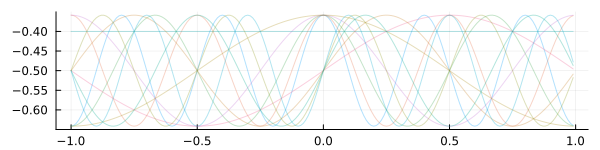

In [6]:
import Plots
Plots.gr()

# initialising an empty plot
p0 = Plots.plot(size=(600,150))

# putting multiple objects on a single plot
[Plots.plot!(p0,s_data,z[:,ii]./10 .- .5, alpha=0.3, label=false) for ii=1:size(z,2)]

# making the plot appear
p0

# What does the below result suggest?

- one column in the feature vector $z$ contains values for a specific feature vector $\phi_d(x)$
- the scalar product is -- also -- defined as the integral
  $$
  \langle \phi_a(\cdot), \phi_b(\cdot) \rangle = \int_\Omega\  \phi_a(x)\phi_b(x) \ dp(x)
  $$
- if we use uniform measure over the $[-1,1]$ - i.e. $dp(x)=1/N$ for a uniform grid - then the above integral is simplified to
  $$
  \langle \phi_i(\cdot), \phi_j(\cdot) \rangle = \frac{1}{N}\sum_i \phi_a(x_i)\phi_b(x_i) 
  $$
  which is the $(i,j)$-th element of the matrix below -- see the julia code at the end of the notebook.
  
<br/>

__Questions__

- What condition does the diagonal nature of the matrix product suggest?
- can you provide an other set of functions with the same condition?

Interpret the result of
```julia
z'*z ./ n_data
```
in the view of the above rationale.

Q1: all values on the diagonal are equal to 2*K

In [14]:
z'*z ./ n_data


11×11 Matrix{Float64}:
 10.0          -9.54792e-16  -6.9742e-16   …   3.55271e-16   1.11022e-16
 -9.54792e-16  10.0          -3.10862e-16      2.21459e-17   0.0
 -6.9742e-16   -3.10862e-16  10.0              0.0           1.11022e-16
  1.17684e-15   4.39649e-16   6.10623e-16     -8.85303e-17  -3.55271e-16
 -6.62849e-16   1.16573e-15  -1.07254e-15     -1.06581e-15   1.22125e-16
  3.21965e-16  -1.09912e-15   3.33067e-16  …  -6.245e-17    -1.77636e-16
  1.2663e-16    8.88178e-17  -5.3421e-17      -1.58117e-16  -1.28716e-16
 -3.55271e-16  -1.27194e-16   0.0             -1.02719e-15   4.85723e-18
 -1.25687e-16   7.10543e-16   4.50677e-17      2.65517e-16   3.48503e-16
  3.55271e-16   2.21459e-17   0.0             10.0           2.7559e-15
  1.11022e-16   0.0           1.11022e-16  …   2.7559e-15   10.0

# Approximating the ABS function

We are building an approximation to the $ABS$ value function over the interval $[-1,1]$.

## First we plot the function 

__Observation:__

Observe that the __set of basis functions__ is in the plot.

In [7]:
# setting up the parameters of the environment
n_data = 20
x_data = -1:(2/n_data ):1
x_data = x_data[1:end-1]
y_data = abs.(x_data)
;

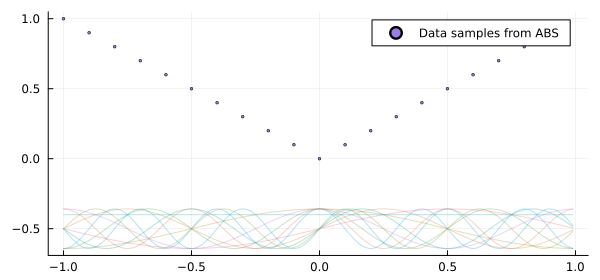

In [8]:
# plotting the data and the basis
p = deepcopy(p0)
p=Plots.scatter!(p, x_data,y_data,width=4, label="Data samples from ABS",ms=1.5,size=(600,280))

In [9]:
# you should rewrite the below code as a function

Φ_y = feat_vec(x_data,K=K)
θ = Φ_y \ y_data
;  # semicolon is to supress the output of the cell

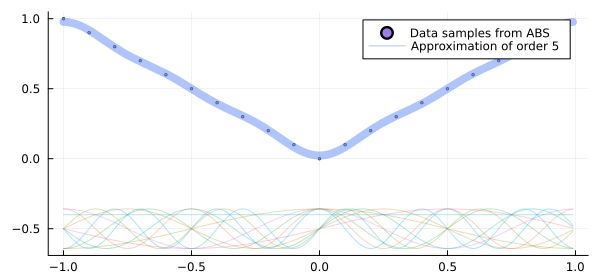

In [10]:
Plots.plot!(p,
    x->pred(x,θ, K),
    alpha=0.5, width=8, 
    label="Approximation of order $K",size=(600,280)
)

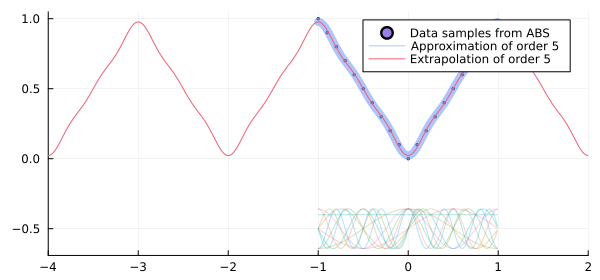

In [11]:
Plots.plot!(p,x->pred(x,θ,K),xlim=(-4,2), label="Extrapolation of order $K",size=(600,280))

We see above that the prediction has nothing to do with the actual function __outside boundaries__.

# Your task:

<br/>

1. For ```n_data```$=N$ in the range $6:3:12$ illustrate - for varying approximation degrees $K$ - the scenario where one of the data-points is left out from the training.
<br/>

1. define the ```leave_one_out(x_data,y_data)``` function that computes the __cumulative error__ computed for $N$=```length(y_data)``` cases, where in each case _a single datum_ was left out from the computation and the optimal parameter prediction was made using the remaining $N-1$ training data items.

1. Plot -- using a surface plot -- with $N$, $K$ -- the __leave-one-out__ error for $N$ equidistant inputs approximated with a harmonic basis of degree $K$.
<br/>

1. Based on the above result, __formulate__ your conclusion in a __MARKDOWN__ cell.

In [ ]:
# your code

In [57]:
function leave_one_out(_x_data, _y_data, K)
    sum = 0;
   for i in 1:size(_x_data)[1]
        x_data = deleteat!(copy(_x_data), i);
        y_data = deleteat!(copy(_y_data), i);
        
        Φ_y = feat_vec(x_data,K=K)
        θ = Φ_y \ y_data
        pred_val = pred(_x_data[i],θ, K)
        #println(pred_val)
        sum = sum + abs(pred_val -_y_data[i]);
        #println(pred_val-_y_data[i]) 
    end
    return sum
end

leave_one_out (generic function with 2 methods)

Any[5.142857142857142, 5.125000000000001, 1.1657341758564144e-15]
Any[2.4705882352941164, 5.8571428571428585, 6.260869565217391]
Any[2.444444444444444, 6.833333333333334, 6.8571428571428585]
Any[2.8205128205128203, 8.2, 7.578947368421053]
Any[3.1304347826086953, 3.39316239316239, 8.47058823529412]
Any[3.4285714285714284, 3.416666666666665, 9.6]
Any[5.142857142857142, 5.125000000000001, 1.1657341758564144e-15, 2.4705882352941164, 5.8571428571428585, 6.260869565217391, 2.444444444444444, 6.833333333333334, 6.8571428571428585, 2.8205128205128203, 8.2, 7.578947368421053, 3.1304347826086953, 3.39316239316239, 8.47058823529412, 3.4285714285714284, 3.416666666666665, 9.6]


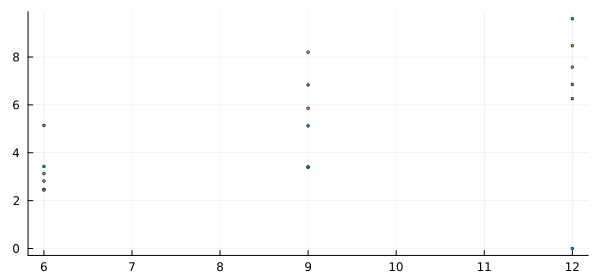

In [60]:
errors = [];
p = Plots.plot(size=(600,150))

for K in 5:10
    local_errors = []
    for n_data in 6:3:12
        n_data = n_data
        x_data = -1:(2/n_data ):1
        x_data = x_data[1:end-1]
        y_data = abs.(x_data)

        err_sum = leave_one_out(collect(x_data), collect(y_data), K)
        #println(err_sum)
        append!(local_errors, err_sum)
    end
    append!(errors, local_errors)
    println(local_errors)
    p=Plots.scatter!(p, 6:3:12, local_errors,width=4, label="",ms=1.5,size=(600,280))
end
println(errors)
display(p)
